# Algorithms for Data Science

## Filtering Stream Items

### 1. Preliminaries 

The objective of this lab is to implement algorithms for filtering "good" items on streams. We will start by the simple implementation using only one hash function, and then it will be required of you to implement the full Bloom filter. We assume a random stream $S$ of $m$ email strings. We assume that the first $g$ emails are the good ones, that we have $n$ bits allocated in the bit array $B$ (for simplicity, implemented as an array here).

In [1]:
import random
from string import ascii_lowercase

#parameters
m = 100
g = 80
stream_size = 10000
n = 512

#generate some random strings of size 5 + 1 + 5
D = []
for _ in range(m):
  D.append(''.join(random.choice(ascii_lowercase) for i in range(5))+\
           '@'+''.join(random.choice(ascii_lowercase) for i in range(5)))



### 2. Creating a Hash Function, Filtering Items Using a Single Hash

In the following we create a hash function $h(x)$, which also takes as a parameter a value and $n$, and returns a value in $0\dots n-1$. We populate the byte array $B$, and then we simulate a stream taking random values from $D$ and checking whether the value is good or not. We measure the true positive, false positive, and false negative rates. 

In [2]:
#hash function
def h(x,n):
  return hash(x)%n

good_set = set(D[:g]) #just for checking TP and FP rates

#allocate the array of 0s
B = [0] * n

#fill the byte array
for i in range(g): B[h(D[i],n)] = 1

tp = 0 # good items passing
fp = 0 # bad items passing
tn = 0 # bad items discarded
fn = 0 # good items discarded

print(" D :")
print(D)

print("good set :")
print(good_set)

#simulate a stream
for _ in range(stream_size):
  #take a random email
  s = random.choice(D)
  #check its hash value
  if B[h(s,n)]==1: #good
    if s not in good_set:
      fp += 1
    else:
      tp += 1
  else: #bad -- this is just a sanity check
    if s in good_set:
      fn += 1
    else:
      tn += 1

print('False positive rate: %f'%(float(fp)/float(tn+fp)))

 D :
['pxtee@xpcpz', 'bdgbs@ibbws', 'adjiu@ernls', 'qkmdz@oducs', 'gxzeg@bnyvl', 'dozra@tlivn', 'lzghu@mrnvh', 'fcdav@yixpc', 'gpfvr@gnusb', 'ngtnt@srqyh', 'qedat@cuhfp', 'qzwwd@jrefl', 'gxelg@higfa', 'tmoda@cgkma', 'zditw@wxaws', 'keqwb@rzedc', 'xmurr@lfkcs', 'aimiw@shtkz', 'qfouk@mvtmb', 'xcffx@xwggd', 'qkmyt@hzsco', 'ihfqx@fhzbx', 'ktnam@zylbr', 'jvoog@cofkt', 'zxkgv@djese', 'xaqve@mmwvb', 'xhqcq@arurt', 'przvo@edhtg', 'sjnbq@hxcqk', 'bhfxz@pcxbn', 'zamxz@bfixv', 'bbvze@snbug', 'zhpjh@bepoa', 'edcmi@wkuvz', 'aqavp@mnxqo', 'oeoko@eklhn', 'aettx@exqmx', 'qqzwx@lhrbc', 'azcrz@jauqr', 'crsuq@sizgs', 'ixpxw@jammt', 'vwgzy@yquyb', 'ropdn@xirpr', 'tgtzb@ieloo', 'huvky@uyjgq', 'dwkkp@nqpdp', 'diixj@rcyvx', 'jlzwm@rvwuu', 'ztyzl@jjale', 'rrrhm@ebase', 'upiec@ylxnd', 'wvbtu@lxtmw', 'heptz@vfcqn', 'xyhlr@ivmgi', 'cstnx@rnfml', 'txlvz@smtcz', 'sorzk@novqa', 'gdbht@omxch', 'bntqo@yqvwz', 'lxaea@rkkwn', 'oplty@yjwvh', 'kxdsz@vlxst', 'qndpb@pqauv', 'wqfwg@wlyes', 'oibqt@lsmtb', 'iuzju@ozifh', 'tfa

We may want to create a random hash function that can also be pairwise independent when we will need to generate $k$ independent pairwise hashes.
The following procedure can be implemented:
* choose a large prime number $p$
* generate two random numbers $a$ and $b$ in the range $\{1,\dots,p\}$
* the hash is then $h_{a,b}(x)=ax+b \mod p$
* we can also restrict it into $\{0,\dots,n-1\}$

In [3]:
p = 1223543677

a = random.randrange(p)
b = random.randrange(p)

def h_i(x,a,b,p,n):
  return ((a*hash(x)+b)%p)%n
#remark: here we use hash(x) instead of the values to allow for all hashable python types
#   e.g., strings, tuples

#reinitialize the array, for testing
B = [0] * n

for i in range(g): 
  B[h_i(D[i],a,b,p,n)] = 1

print(B)

[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 

### 3. **TASK** - Bloom Filters

Your task is to implement the Bloom filters as described in the class lecture. For this, you have to:
1. generate $k$ random pairwise independent hash functions (_hint_: use the example shown above)
2. initialize $B$, by setting $1$ in each $h_i(x)$, $i\in\{1,\dots,k\}$, for all items $x$ in the good set
3. an item $s$ in the stream is considered good if, for all $i\in\{1,\dots,k\}$, we have $B[h_i(s)]=1$

Measure the true positive and false positive rate for various values of $k$ and compare to the values obtained when setting $k=n/m\ln 2$ (to the nearest integer value). What do you notice?

Rates:

$
  \text{false positive rate} \frac{FP}{FP+TN}
$

$
  \text{true positive rate} \frac{TP}{TP+FN}
$

In [36]:
# YOUR CODE HERE
k = 3 # number of independent hash functions

#reinitialize the array
B = [0] * n

#define the independant hash functions h_i

hash_bank = [] # stores all defining parametres for the hash functions

for i in range(k):
    #n, p are know so we store a tuple (a,b) to identify each hash function
    hash_bank.append((random.randrange(p),random.randrange(p)))
    
print(hash_bank)

# insert elements and initialize B with hash functions values

for i in range(g): # for each wanted values
    for hash_params in hash_bank: # for all hash functions
        B[h_i(D[i],hash_params[0],hash_params[1],p,n)] = 1
        
        

def is_element_accepted_by_all_hash_function(element,params_list,bits_vector):
    correct = True
    index_params = 0
    while correct and (index_params<len(params_list)):
        if bits_vector[h_i(element,params_list[index_params][0],params_list[index_params][1],p,n)] == 1:
            index_params+=1
        else:
            correct = False
    
    return correct

print(B)

tp = 0 # good items passing
fp = 0 # bad items passing
tn = 0 # bad items discarded
fn = 0 # good items discarded

for _ in range(stream_size):
  #take a random email
  s = random.choice(D)
  #check its hash value
  if is_element_accepted_by_all_hash_function(s,hash_bank,B): #good
    if s not in good_set:
      fp += 1
    else:
      tp += 1
  else: #bad -- this is just a sanity check
    if s in good_set:
      fn += 1
    else:
      tn += 1

print('False positive rate: %f'%(float(fp)/float(tn+fp)))
print('True positive rate: %f'%(float(tp)/float(tp+fn)))
        


#

[(433658179, 647158734), (167384188, 32854206), (779595818, 1041985266)]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

_You can use this cell to write your discussion of the results_

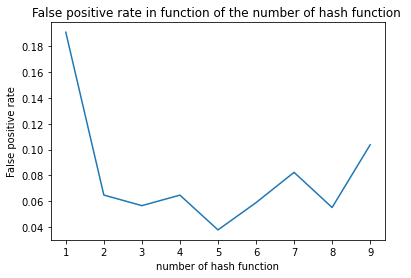

In [38]:

def exprement_with_k(k):
    B = [0] * n
    
    hash_bank = [] # stores all defining parametres for the hash functions

    for i in range(k):
        #n, p are know so we store a tuple (a,b) to identify each hash function
        hash_bank.append((random.randrange(p),random.randrange(p)))

    # insert elements and initialize B with hash functions values

    for i in range(g): # for each wanted values
        for hash_params in hash_bank: # for all hash functions
            B[h_i(D[i],hash_params[0],hash_params[1],p,n)] = 1

    tp = 0 # good items passing
    fp = 0 # bad items passing
    tn = 0 # bad items discarded
    fn = 0 # good items discarded

    for _ in range(stream_size):
      #take a random email
        s = random.choice(D)
      #check its hash value
        if is_element_accepted_by_all_hash_function(s,hash_bank,B): #good
            if s not in good_set:
                fp += 1
            else:
                tp += 1
        else: #bad -- this is just a sanity check
            if s in good_set:
                fn += 1
            else:
                tn += 1

    return float(fp)/float(tn+fp)


import matplotlib.pyplot as plt
from statistics import mean

precision = 7 # allows to exprement many times and avoid noise generated by randomness

params_vector = [1,2,3,4,5,6,7,8,9]
result_vector = []

for param in params_vector:
    results = []
    for _try in range(precision):
        results.append(exprement_with_k(param))
        
    result_vector.append(mean(results))
    
plt.xlabel('number of hash function')
plt.ylabel('False positive rate')
plt.title('False positive rate in function of the number of hash function ');
plt.plot(params_vector,result_vector)




5.984